In [66]:

#importing the the dataset from the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#storing it in the variable
dataset="/content/drive/MyDrive/assignment_2/Breas Cancer.csv"

In [3]:
#importing packages
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

In [4]:
#splitting the dataset into training and testing
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [5]:
#print the shape of the of the image
print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

(28, 28)
784


In [6]:
#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [11]:
#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [8]:
#compiling the built model with different parameters
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/10
235/235 [==============================] - 6s 22ms/step - loss: 0.3585 - accuracy: 0.8874 - val_loss: 0.1585 - val_accuracy: 0.9505
Epoch 2/10
235/235 [==============================] - 6s 26ms/step - loss: 0.1094 - accuracy: 0.9664 - val_loss: 0.1883 - val_accuracy: 0.9432
Epoch 3/10
235/235 [==============================] - 5s 20ms/step - loss: 0.0691 - accuracy: 0.9787 - val_loss: 0.1129 - val_accuracy: 0.9657
Epoch 4/10
235/235 [==============================] - 6s 25ms/step - loss: 0.0492 - accuracy: 0.9845 - val_loss: 0.1555 - val_accuracy: 0.9573
Epoch 5/10
235/235 [==============================] - 5s 20ms/step - loss: 0.0365 - accuracy: 0.9887 - val_loss: 0.0772 - val_accuracy: 0.9764
Epoch 6/10
235/235 [==============================] - 5s 20ms/step - loss: 0.0271 - accuracy: 0.9917 - val_loss: 0.0816 - val_accuracy: 0.9770
Epoch 7/10
235/235 [==============================] - 6s 26ms/step - loss: 0.0196 - accuracy: 0.9937 - val_loss: 0.0669 - val_accuracy: 0.9825

Change the data source to Breast Cancer dataset *

In [12]:
#importing the packages required for th csv dataset
import pandas as pd
import numpy as np
from keras import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [21]:
#loading the new dataset and chnaging the target variable to 1 -0
dataset="/content/drive/MyDrive/assignment_2/Breas Cancer.csv"
data = pd.read_csv(dataset)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

labels = data['diagnosis'].values

#dropping the target column
features = data.drop('diagnosis', axis=1).values

In [22]:
#splitting the dataset
train_data, test_data, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42)


In [26]:
#building the dens models and adding the more dense layers
model.add(Dense(512, activation='relu', input_shape=(train_data.shape[1],)))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [27]:
#compiling the built network models
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
# Training the model
history = model.fit(train_data, train_labels, batch_size=256, epochs=10, verbose=1,
                    validation_data=(test_data, test_labels))

Epoch 1/10
2/2 [==============================] - 1s 155ms/step - loss: nan - accuracy: 0.6286 - val_loss: nan - val_accuracy: 0.6228
Epoch 2/10
2/2 [==============================] - 0s 39ms/step - loss: nan - accuracy: 0.6286 - val_loss: nan - val_accuracy: 0.6228
Epoch 3/10
2/2 [==============================] - 0s 43ms/step - loss: nan - accuracy: 0.6286 - val_loss: nan - val_accuracy: 0.6228
Epoch 4/10
2/2 [==============================] - 0s 43ms/step - loss: nan - accuracy: 0.6286 - val_loss: nan - val_accuracy: 0.6228
Epoch 5/10
2/2 [==============================] - 0s 44ms/step - loss: nan - accuracy: 0.6286 - val_loss: nan - val_accuracy: 0.6228
Epoch 6/10
2/2 [==============================] - 0s 39ms/step - loss: nan - accuracy: 0.6286 - val_loss: nan - val_accuracy: 0.6228
Epoch 7/10
2/2 [==============================] - 0s 42ms/step - loss: nan - accuracy: 0.6286 - val_loss: nan - val_accuracy: 0.6228
Epoch 8/10
2/2 [==============================] - 0s 45ms/step - los

Scaling the data

In [28]:
#importing the scaler
from sklearn.preprocessing import StandardScaler


In [29]:
#passing the data to the imported scaler
sc = StandardScaler()
scaled_features = sc.fit_transform(features)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [30]:
# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(scaled_features, labels, test_size=0.2, random_state=42)


In [32]:
# Creating the network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(train_data.shape[1],)))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [33]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])


In [34]:
# Training the model
history = model.fit(train_data, train_labels, batch_size=256, epochs=10, verbose=1,
                    validation_data=(test_data, test_labels))

Epoch 1/10
2/2 [==============================] - 1s 157ms/step - loss: nan - accuracy: 0.6286 - val_loss: nan - val_accuracy: 0.6228
Epoch 2/10
2/2 [==============================] - 0s 34ms/step - loss: nan - accuracy: 0.6286 - val_loss: nan - val_accuracy: 0.6228
Epoch 3/10
2/2 [==============================] - 0s 35ms/step - loss: nan - accuracy: 0.6286 - val_loss: nan - val_accuracy: 0.6228
Epoch 4/10
2/2 [==============================] - 0s 37ms/step - loss: nan - accuracy: 0.6286 - val_loss: nan - val_accuracy: 0.6228
Epoch 5/10
2/2 [==============================] - 0s 37ms/step - loss: nan - accuracy: 0.6286 - val_loss: nan - val_accuracy: 0.6228
Epoch 6/10
2/2 [==============================] - 0s 32ms/step - loss: nan - accuracy: 0.6286 - val_loss: nan - val_accuracy: 0.6228
Epoch 7/10
2/2 [==============================] - 0s 33ms/step - loss: nan - accuracy: 0.6286 - val_loss: nan - val_accuracy: 0.6228
Epoch 8/10
2/2 [==============================] - 0s 49ms/step - los

### In class programming 2


In [48]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical
#importing the hand written dataset.
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

(28, 28)
784


In [49]:
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [50]:
#build the network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [51]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/10
235/235 [==============================] - 5s 20ms/step - loss: 0.2887 - accuracy: 0.9112 - val_loss: 0.1485 - val_accuracy: 0.9547
Epoch 2/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0984 - accuracy: 0.9696 - val_loss: 0.1010 - val_accuracy: 0.9666
Epoch 3/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0620 - accuracy: 0.9805 - val_loss: 0.0745 - val_accuracy: 0.9766
Epoch 4/10
235/235 [==============================] - 5s 20ms/step - loss: 0.0418 - accuracy: 0.9870 - val_loss: 0.0821 - val_accuracy: 0.9748
Epoch 5/10
235/235 [==============================] - 4s 16ms/step - loss: 0.0306 - accuracy: 0.9905 - val_loss: 0.0779 - val_accuracy: 0.9762
Epoch 6/10
235/235 [==============================] - 4s 16ms/step - loss: 0.0220 - accuracy: 0.9933 - val_loss: 0.0587 - val_accuracy: 0.9840
Epoch 7/10
235/235 [==============================] - 5s 20ms/step - loss: 0.0159 - accuracy: 0.9950 - val_loss: 0.0850 - val_accuracy: 0.9771

Plot values

In [52]:
import matplotlib.pyplot as plt


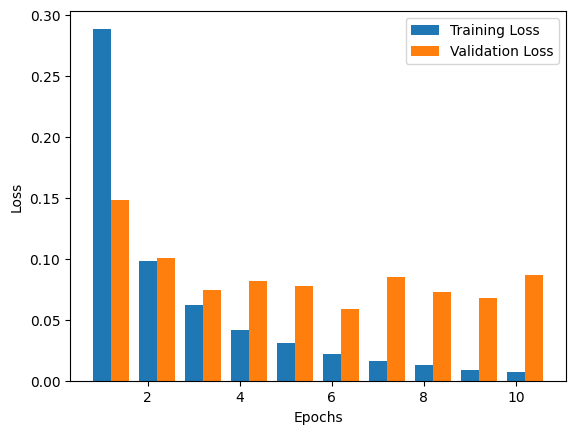

In [53]:
#plotting the graph of Loss with the values.
epochs = range(1, 11)
bar_width = 0.4

plt.bar(epochs, history.history['loss'], width=bar_width, label='Training Loss')
plt.bar([epoch + bar_width for epoch in epochs], history.history['val_loss'], width=bar_width, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

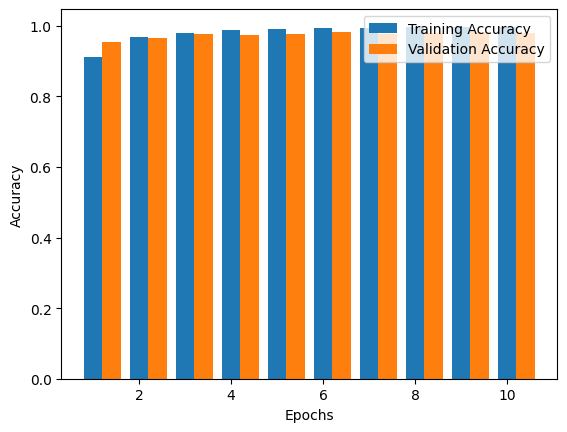

In [55]:
#plotting the accuracy graph
epochs = range(1, 11)
bar_width = 0.4

plt.bar(epochs, history.history['accuracy'], width=bar_width, label='Training Accuracy')
plt.bar([epoch + bar_width for epoch in epochs], history.history['val_accuracy'], width=bar_width, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

 ### inferencing to check

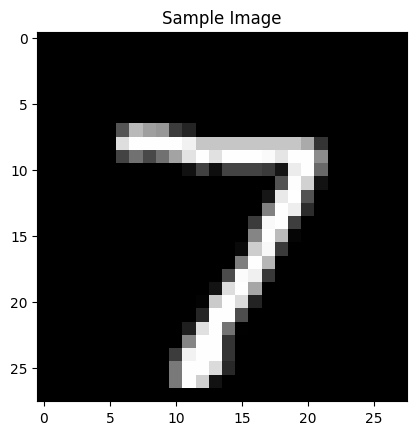

1/1 [==============================] - 0s 41ms/step
Predicted Label: 7


In [56]:
#plotting the image
plt.imshow(test_images[0], cmap='gray')
plt.title('Sample Image')
plt.show()

# Inference on a single image
sample_image = test_data[0].reshape(1, -1)
prediction = model.predict(sample_image)
predicted_label = np.argmax(prediction[0])
print(f'Predicted Label: {predicted_label}')

Changing Hidden Layers and Activation Function

In [57]:
#adding more layers with TANh and sigmod activation function

model = Sequential()
model.add(Dense(256, activation='tanh', input_shape=(dimData,)))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [58]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [59]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                    validation_data=(test_data, test_labels_one_hot))

Epoch 1/10
235/235 [==============================] - 2s 8ms/step - loss: 0.5182 - accuracy: 0.8607 - val_loss: 0.2436 - val_accuracy: 0.9301
Epoch 2/10
235/235 [==============================] - 2s 9ms/step - loss: 0.2103 - accuracy: 0.9372 - val_loss: 0.1821 - val_accuracy: 0.9450
Epoch 3/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1506 - accuracy: 0.9553 - val_loss: 0.1494 - val_accuracy: 0.9539
Epoch 4/10
235/235 [==============================] - 2s 8ms/step - loss: 0.1161 - accuracy: 0.9644 - val_loss: 0.1196 - val_accuracy: 0.9648
Epoch 5/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0930 - accuracy: 0.9718 - val_loss: 0.1095 - val_accuracy: 0.9656
Epoch 6/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0754 - accuracy: 0.9767 - val_loss: 0.0953 - val_accuracy: 0.9694
Epoch 7/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0622 - accuracy: 0.9808 - val_loss: 0.1016 - val_accuracy: 0.9696
Epoch

skipping the scaling

In [ ]:
#loading the dataset again as the pervious values are scaled
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()


In [60]:
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

784


In [61]:
train_data = train_data.astype('float')
test_data = test_data.astype('float')

In [62]:
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [63]:
model = Sequential()
model.add(Dense(256, activation='tanh', input_shape=(dimData,)))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [64]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [65]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                    validation_data=(test_data, test_labels_one_hot))

Epoch 1/10
235/235 [==============================] - 2s 8ms/step - loss: 0.5260 - accuracy: 0.8573 - val_loss: 0.3228 - val_accuracy: 0.9027
Epoch 2/10
235/235 [==============================] - 2s 7ms/step - loss: 0.2619 - accuracy: 0.9208 - val_loss: 0.2354 - val_accuracy: 0.9301
Epoch 3/10
235/235 [==============================] - 2s 9ms/step - loss: 0.2173 - accuracy: 0.9330 - val_loss: 0.2141 - val_accuracy: 0.9343
Epoch 4/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1961 - accuracy: 0.9389 - val_loss: 0.1904 - val_accuracy: 0.9417
Epoch 5/10
235/235 [==============================] - 2s 7ms/step - loss: 0.1723 - accuracy: 0.9477 - val_loss: 0.1742 - val_accuracy: 0.9428
Epoch 6/10
235/235 [==============================] - 2s 7ms/step - loss: 0.1620 - accuracy: 0.9496 - val_loss: 0.1671 - val_accuracy: 0.9466
Epoch 7/10
235/235 [==============================] - 2s 7ms/step - loss: 0.1502 - accuracy: 0.9530 - val_loss: 0.1533 - val_accuracy: 0.9526
Epoch